# Comparing the densities in the GC and the GC+FES run

*Author: Miriam Sterl*

We plot the year-averaged particle densities for different years of the GC and the GC+FES run.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker

In [2]:
def DensityPlot(lon, lat, dens, ax, title):
    """
    Function that plots the average density in number of particles per km^2 on the globe for a certain year
    
    :param lon: the longitudes on the grid
    :param lat: the latitudes on the grid
    :param dens: the average particle density data for the specified year
    :returns: a plot of the average particle density in the specified year
    """
    Lat, Lon = np.meshgrid(lat, lon)
    density = ax.pcolormesh(Lon, Lat, dens/1e-4, cmap = 'viridis', norm = colors.LogNorm(1e-1, 1e1), zorder=2) 
    
    ax.coastlines()
    ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black', facecolor=(0.6,0.6,0.6))
    ax.set_xticks([-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180], crs=ccrs.PlateCarree())
    ax.set_xticklabels([-180, -150, -120, -90, -60, -30, 0, 30, 60, 90, 120, 150, 180], fontsize=10)
    ax.set_yticks([-90, -60, - 30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
    ax.set_yticklabels([-90, -60, - 30, 0, 30, 60, 90], fontsize=10)
    lon_formatter = cticker.LongitudeFormatter()
    lat_formatter = cticker.LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.grid(linewidth=2, color='black', alpha=0.25, linestyle=':')
    ax.set_title(title,fontsize=14,fontweight='bold')
    
    return density

In [3]:
yearstart = [0, 183, 365, 548, 731, 913, 1096, 1279, 1461, 1644, 1826, 2009, 2192, 2374] 
# the index of the time data where each year starts, beginning with 2002, ending with 2015 (note: there is just 1 date in 2015)

In [4]:
binsLon = np.arange(-180, 181, 1) # the bins in longitudinal direction
binsLat = np.arange(-80, 81, 1) # the bins in latitudinal direction

In [5]:
calcDens_GC = np.load('/science/projects/oceanparcels/output_data/data_Miriam/DensityGC')
calcDens_GCFES = np.load('/science/projects/oceanparcels/output_data/data_Miriam/DensityGCFES')

In [6]:
titles = ['(a) GC 2002', '(b) GC 2006', '(c) GC 2010', '(d) GC 2014',
          '(e) GC+FES 2002', '(f) GC+FES 2006', '(g) GC+FES 2010', '(h) GC+FES 2014']
titlesGC = ['(a) GC 2002', '(b) GC 2006', '(c) GC 2010', '(d) GC 2014']
titlesGCFES = ['(e) GC+FES 2002', '(f) GC+FES 2006', '(g) GC+FES 2010', '(h) GC+FES 2014']

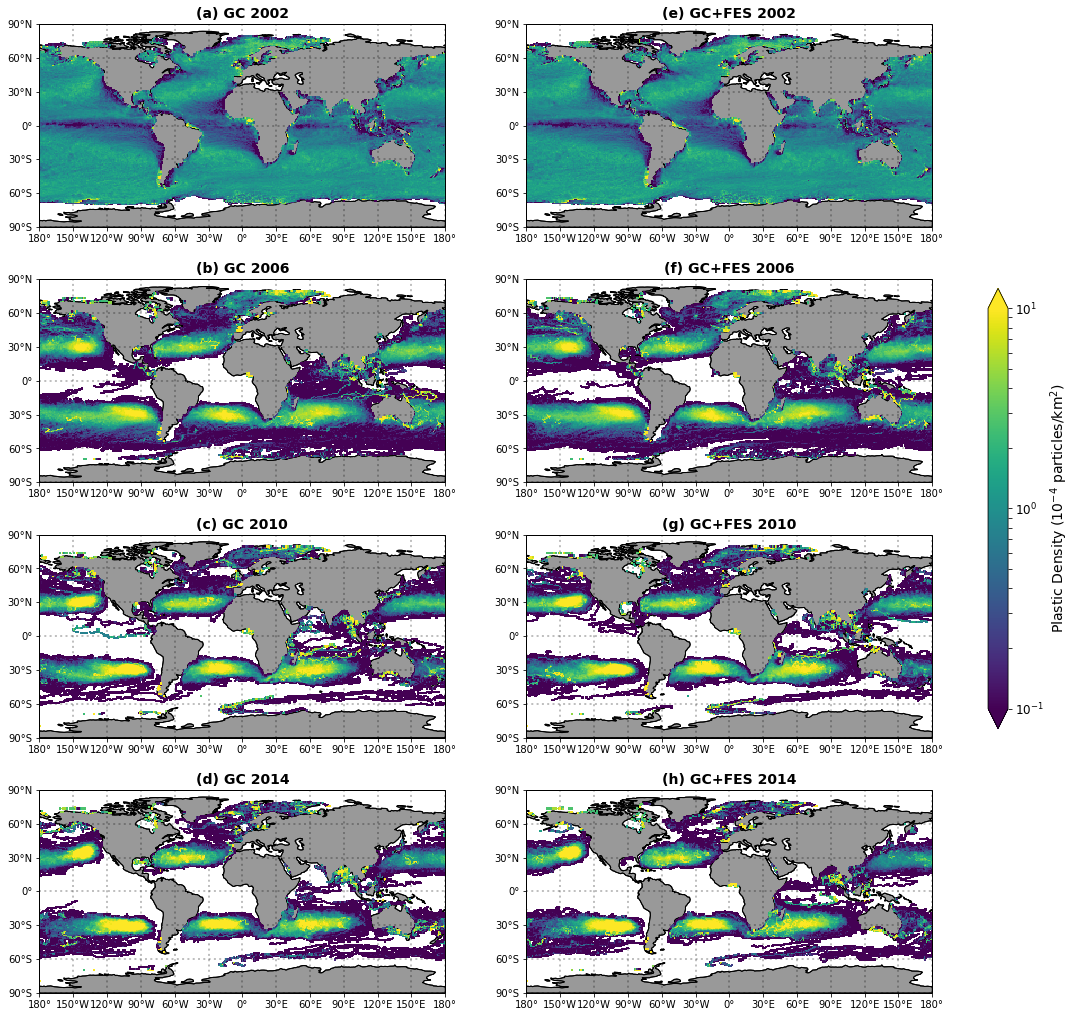

In [7]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20,18), subplot_kw={'projection': ccrs.PlateCarree()})
i=0 # counter over subplots (left = even, right = odd)
j=0 # counter over the years for GC
k=0 # counter over the titles for GC
l=0 # counter over the years for GC+FES
m=0 # counter over the titles for GC+FES 
for ax in axes.flat:
    if i%2==0:
        YearAverageDensity = np.mean(calcDens_GC[yearstart[j]:yearstart[j+1],:,:], axis=0)
        density = DensityPlot(binsLon, binsLat, YearAverageDensity, ax, titlesGC[k])
        j=j+4
        k=k+1
    else: 
        YearAverageDensity = np.mean(calcDens_GCFES[yearstart[l]:yearstart[l+1],:,:], axis=0)
        density = DensityPlot(binsLon, binsLat, YearAverageDensity, ax, titlesGCFES[m])
        l=l+4
        m=m+1
    i=i+1
cbar = fig.colorbar(density, ax=axes.ravel().tolist(), shrink = 0.45, extend='both')
cbar.set_label("Plastic Density ($10^{-4}$ particles/km$^{2}$)", rotation=90,fontsize=14)
cbar.ax.tick_params(labelsize=12)
#plt.savefig('DensityComparison', bbox_inches='tight')